<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/ML_Regression/MiniProject_2_Credit_risk_modelling_Logistic_Regression_Deepak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

## Grading = 10 Points

### Download the dataset

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [2]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [ ]:
# !pip install xverse

### Import Neccesary Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [4]:
# YOUR CODE HERE
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


In [5]:
# YOUR CODE HERE
df_credit = pd.read_csv('GiveMeSomeCredit.csv')

#### Describe the all statistical properties of the train dataset

In [6]:
# YOUR CODE HERE
df_credit.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


### Pre-processing (1 point)

In [7]:
df_credit.shape


(150000, 12)

#### Remove unwanted columns

In [8]:
# YOUR CODE HERE
df_credit.drop(['Unnamed: 0'], axis=1, inplace=True)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [9]:
# YOUR CODE HERE
round(df_credit.isnull().sum()).sort_values(ascending=False)

MonthlyIncome                           29731
NumberOfDependents                       3924
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64

In [10]:
meanMonthlyIncome = df_credit['MonthlyIncome'].mean()
print(round(meanMonthlyIncome, 1))
df_credit['MonthlyIncome'].fillna(value=meanMonthlyIncome, inplace=True)

6670.2


In [11]:
medianNumberOfDependents = df_credit['NumberOfDependents'].median()
print(medianNumberOfDependents)
df_credit['NumberOfDependents'].fillna(int(medianNumberOfDependents), inplace=True)

0.0


In [12]:
# Find % of missing values in each column
round(100*(df_credit.isnull().sum()/len(df_credit)), 4).sort_values(ascending=False)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [13]:
# YOUR CODE HERE
df_credit["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [14]:
percentageDlqChance = df_credit['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
print(percentageDlqChance)

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


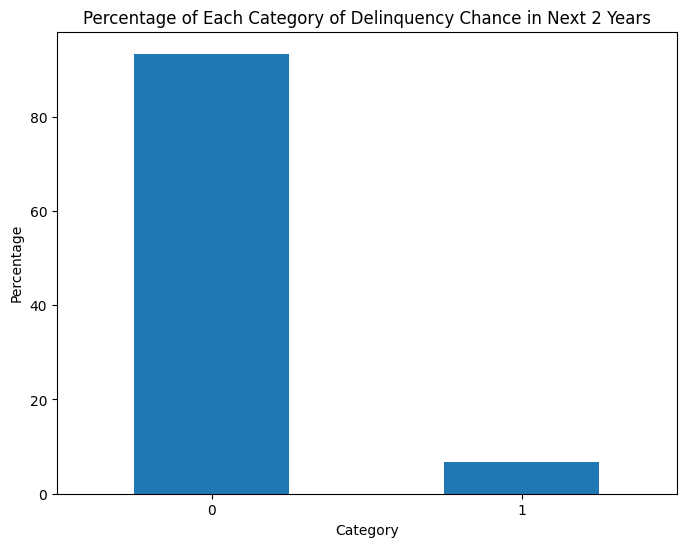

In [15]:
plt.figure(figsize=(8, 6))
percentageDlqChance.plot(kind='bar')
plt.title('Percentage of Each Category of Delinquency Chance in Next 2 Years')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

<ipython-input-16-b5f0bdd89464>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeriousDlqin2yrs', y='age', data=df_credit, palette = "bright")


<Axes: xlabel='SeriousDlqin2yrs', ylabel='age'>

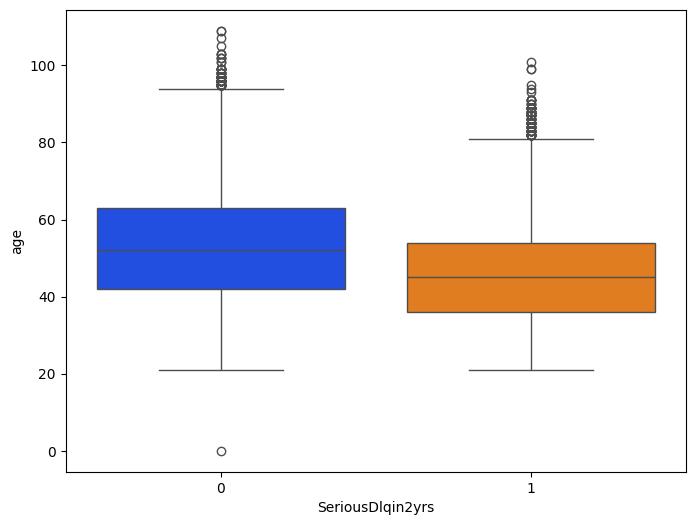

In [16]:
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
sns.boxplot(x='SeriousDlqin2yrs', y='age', data=df_credit, palette = "bright")

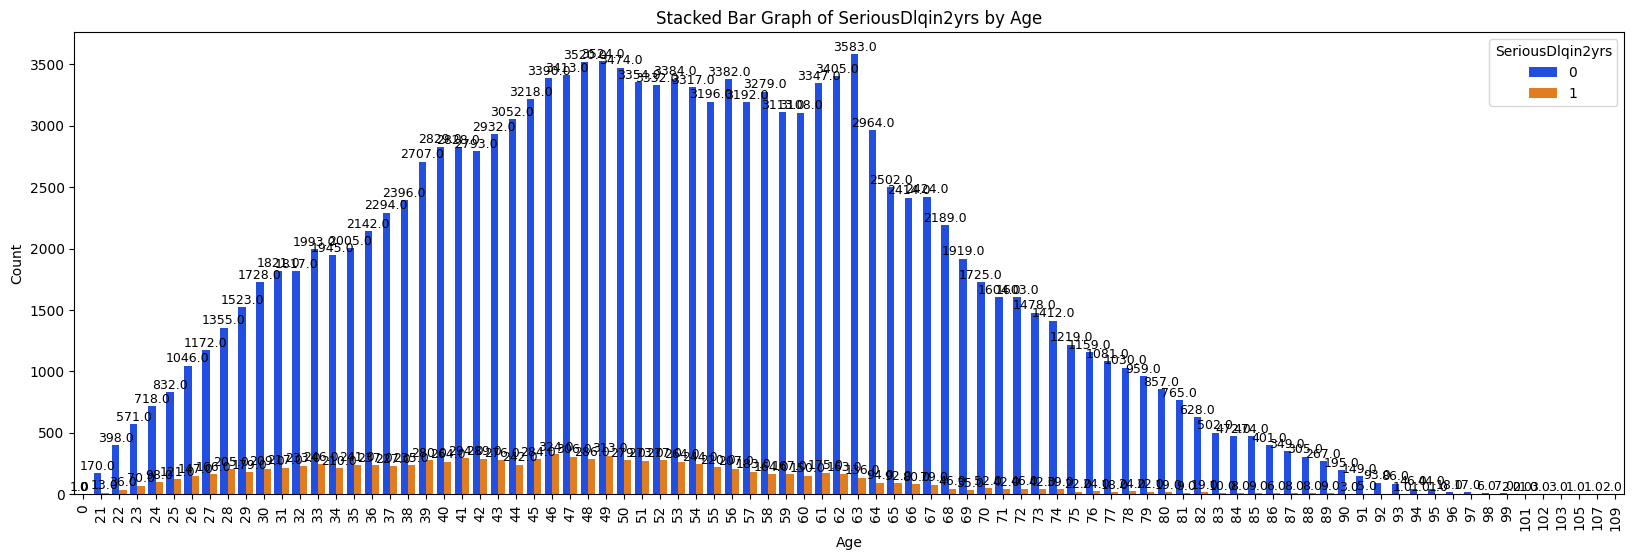

In [19]:
#STAN-ToDo: Include Stacked Bar Graph with age on X axis and SeriousDlqin2yrs on Y-axis
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='age', hue='SeriousDlqin2yrs', data=df_credit, palette='bright')

plt.title('Stacked Bar Graph of SeriousDlqin2yrs by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='SeriousDlqin2yrs')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# Add text annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#### Calculate the correlation and plot the heatmap

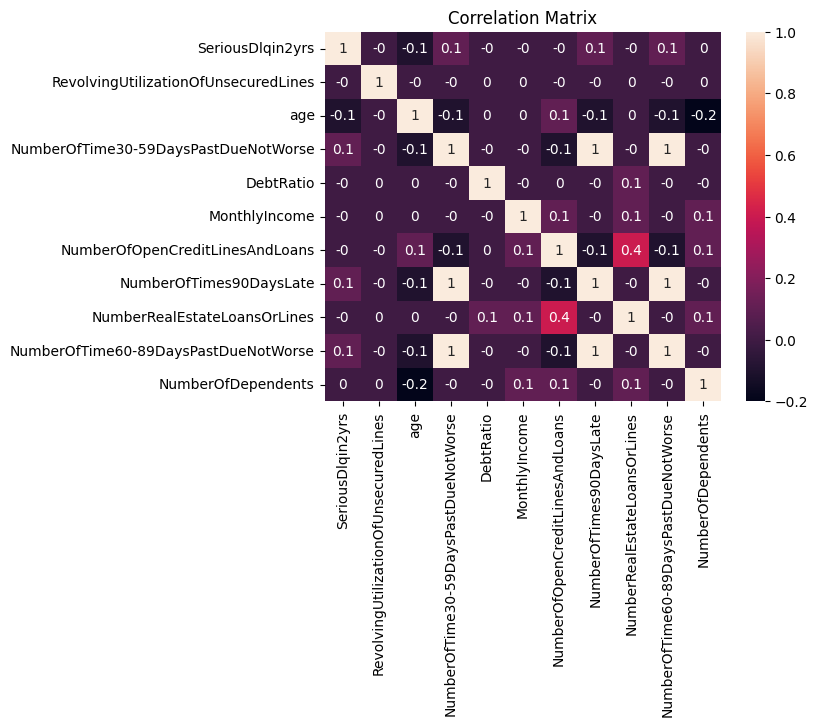

In [20]:
# YOUR CODE HERE
corr_matrix = df_credit.corr().round(1)
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [22]:
# YOUR CODE HERE
y = df_credit['SeriousDlqin2yrs']
X = df_credit.drop(['SeriousDlqin2yrs'], axis=1)

In [23]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

print(clf.bins)
output_bins = clf.bins #will be used later in this exercise

{'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


### Identify features,  target and split it into train and test

In [24]:
# YOUR CODE HERE
clf = WOE()
clf.fit(X, y)
df_WOE = clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well.
print(df_WOE)
df_Inf_Val = clf.iv_df #information value dataset
print(df_Inf_Val)

                           Variable_Name               Category   Count  \
0   RevolvingUtilizationOfUnsecuredLines       (-0.001, 0.0544]   50000   
1   RevolvingUtilizationOfUnsecuredLines         (0.0544, 0.38]   50000   
2   RevolvingUtilizationOfUnsecuredLines        (0.38, 50708.0]   50000   
3                                    age         (-0.001, 45.0]   51305   
4                                    age           (45.0, 59.0]   50377   
5                                    age          (59.0, 109.0]   48318   
6   NumberOfTime30-59DaysPastDueNotWorse          (-0.001, 1.0]  142051   
7   NumberOfTime30-59DaysPastDueNotWorse            (1.0, 98.0]    7949   
8                              DebtRatio        (-0.001, 0.238]   50000   
9                              DebtRatio          (0.238, 0.57]   50000   
10                             DebtRatio       (0.57, 329664.0]   50000   
11                         MonthlyIncome       (-0.001, 4700.0]   50276   
12                       

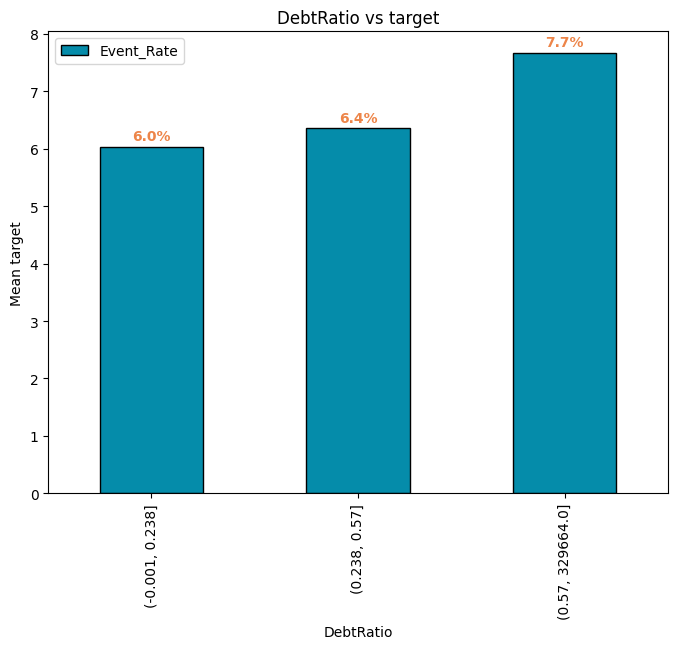

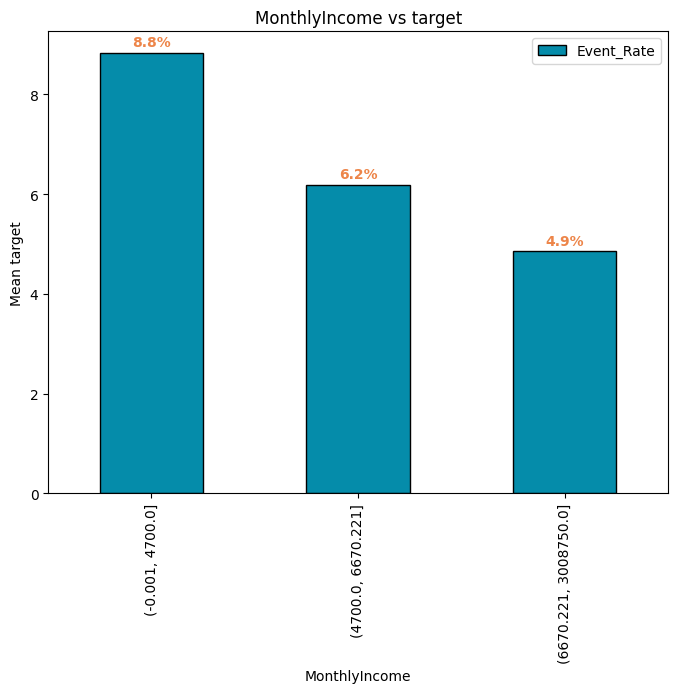

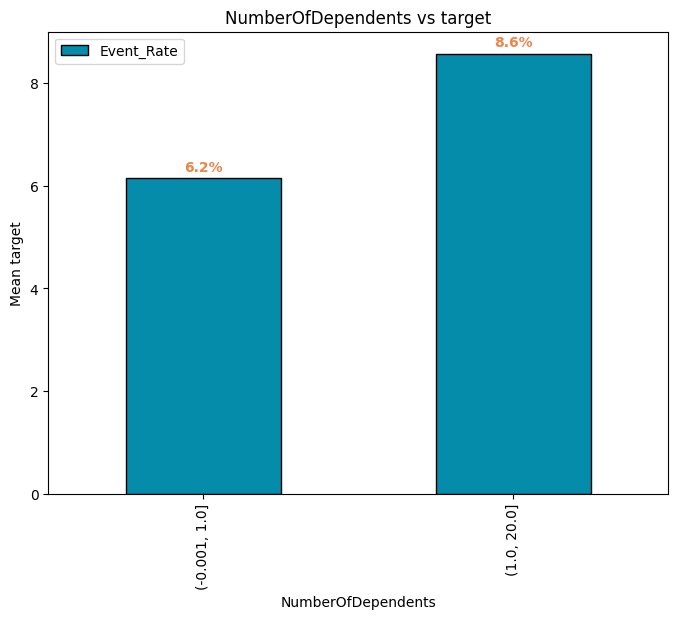

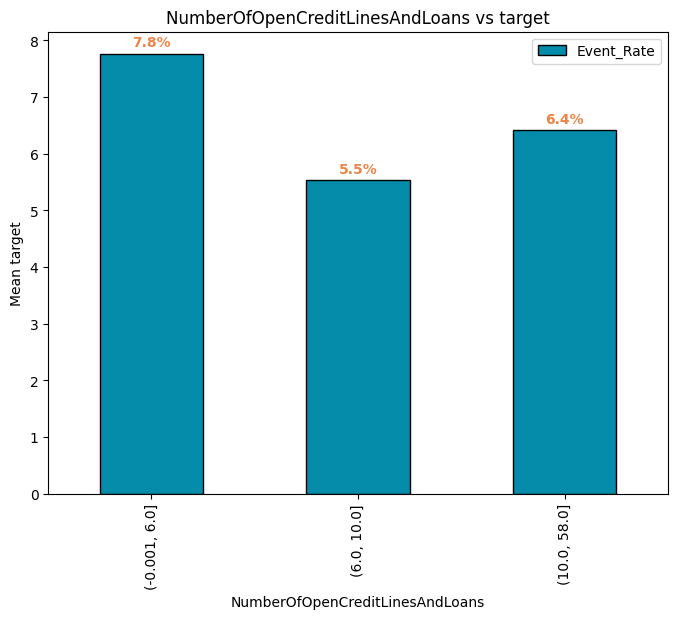

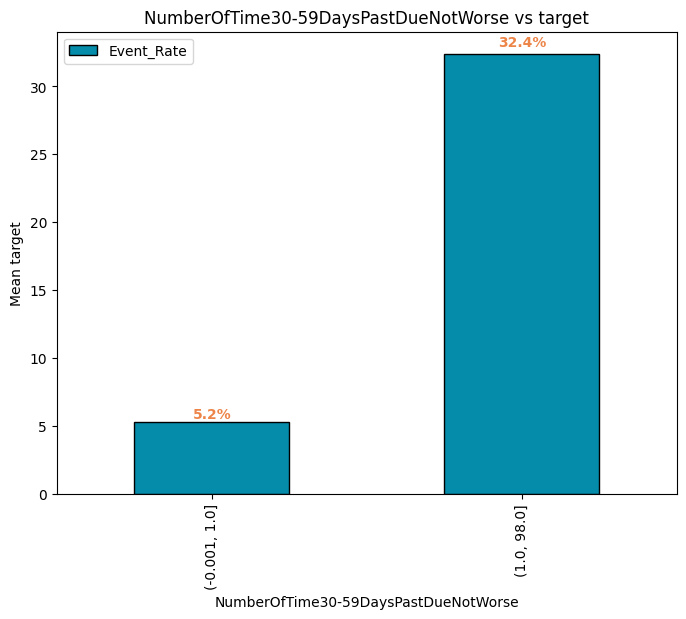

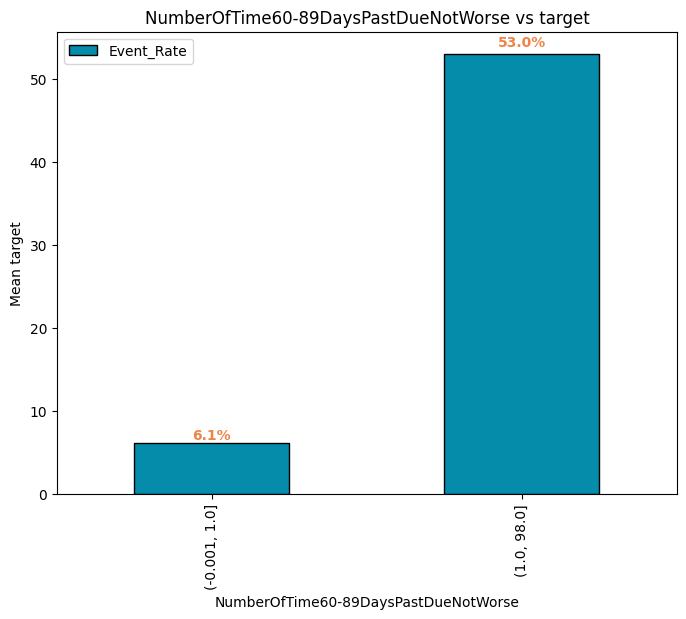

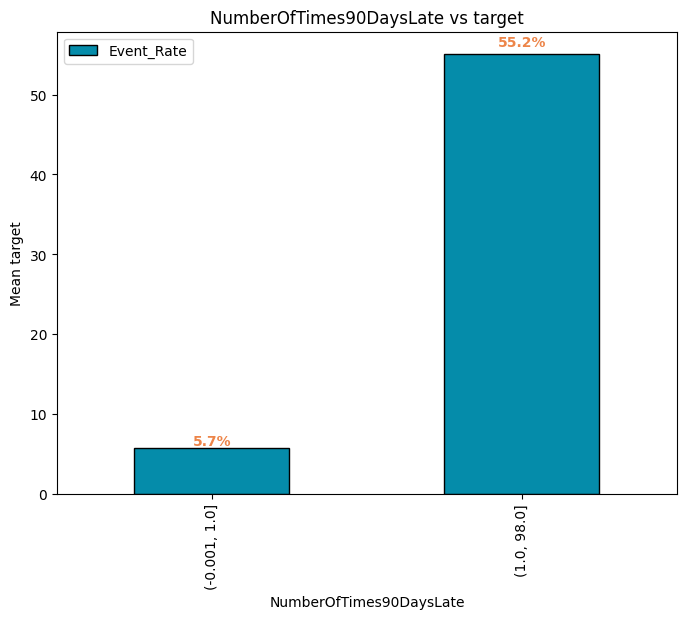

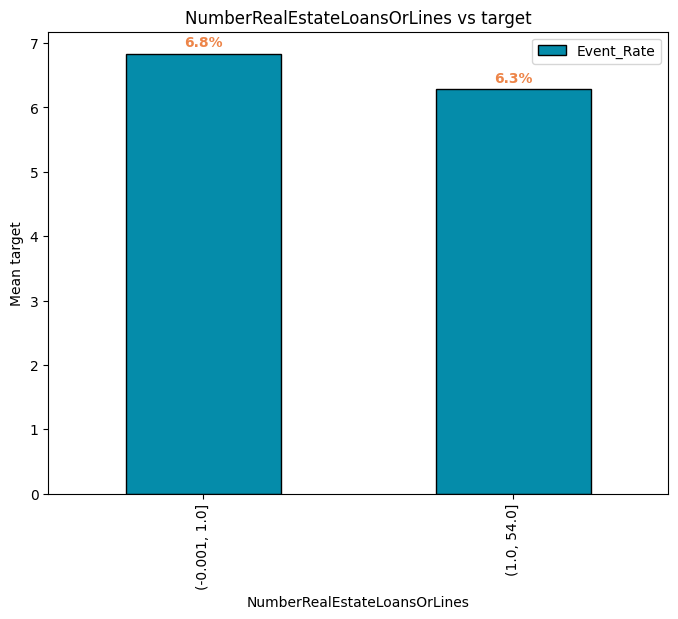

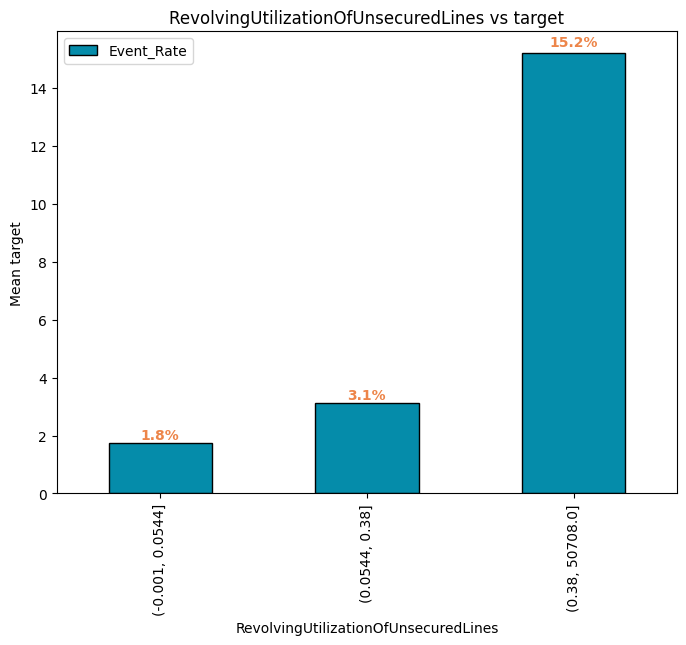

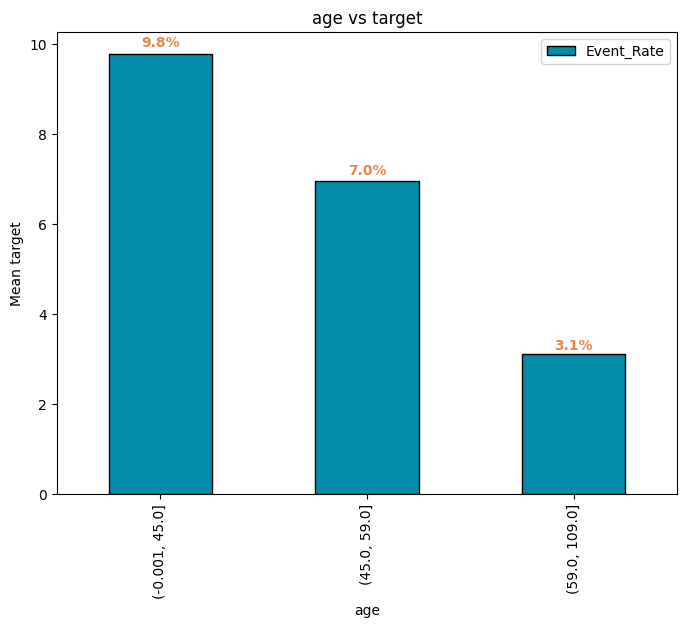

BarCharts(bar_type='v')

In [25]:
from xverse.graph import BarCharts
clf = BarCharts(bar_type='v')
clf.plot(df_WOE)

In [26]:
strongFeatures = df_Inf_Val[(df_Inf_Val['Information_Value'] <= 0.5) & (df_Inf_Val['Information_Value'] >= 0.3)]['Variable_Name']
strongFeatures

6                 NumberOfTimes90DaysLate
4    NumberOfTime30-59DaysPastDueNotWorse
Name: Variable_Name, dtype: object

In [27]:
strongFeatures.head(3)

6                 NumberOfTimes90DaysLate
4    NumberOfTime30-59DaysPastDueNotWorse
Name: Variable_Name, dtype: object

In [28]:
mediumFeatures = df_Inf_Val[(df_Inf_Val['Information_Value'] <= 0.3) & (df_Inf_Val['Information_Value'] >= 0.1)]['Variable_Name']
mediumFeatures

5    NumberOfTime60-89DaysPastDueNotWorse
9                                     age
Name: Variable_Name, dtype: object

In [29]:
strongFeaturesList = list(strongFeatures)
mediumFeaturesList = list(mediumFeatures)

In [30]:
selectedFeaturesList = strongFeaturesList + mediumFeaturesList
selectedFeaturesList

['NumberOfTimes90DaysLate',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age']

In [31]:
df_credit_features = df_credit[selectedFeaturesList]
df_credit_features.head()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,age
0,0,2,0,45
1,0,0,0,40
2,1,1,0,38
3,0,0,0,30
4,0,1,0,49


In [32]:
df_credit_features.shape

(150000, 4)

In [33]:
df_credit_target = df_credit['SeriousDlqin2yrs']
df_credit_target.head(2)

0    1
1    0
Name: SeriousDlqin2yrs, dtype: int64

In [34]:
df_credit_target.shape

(150000,)

In [35]:
X = df_credit_features
y = df_credit_target
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120000, 4), (30000, 4), (120000,), (30000,))

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [37]:
# YOUR CODE HERE
# Define Sigmoid function (stipulate bounds)
def sigmoid(x):
    return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)

#Define cost function
def cost_function(x, y, theta):
    t = x.dot(theta)
    return -1*((np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t)))) / x.shape[0])

In [38]:
def gradient_cost_function(x, y, theta):
    t = x.dot(theta)
    return x.T.dot(y - sigmoid(t)) / x.shape[0]

# Define update step in Gradient Descent
def update_theta(x, y, theta, learning_rate):
    return theta + learning_rate * gradient_cost_function(x, y, theta)

In [50]:
np.zeros(X_train.shape[1])

array([0., 0., 0., 0.])

In [51]:
def train(x, y, learning_rate, iterations=500, threshold=0.0005):

    theta = np.zeros(x.shape[1]) # Initizalizing the theta (Coef vector to 0 initially. Later updating it)
    costs = []

    print("Start training")

    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)

        cost = cost_function(x, y, theta)

        print(f"Training step #{i} - Cost function: {cost:.4f}")

        costs.append({"cost": cost, "weights": theta})

        if i > 15 and abs(costs[-2]["cost"] - costs[-1]["cost"]) < threshold:
            print(f"[Training step #{i}] - Cost function: {cost:.4f}")
            print(f"Training completed\n")
            break

    return theta, costs

In [40]:
X_train.shape

(120000, 4)

In [41]:
Theta_model_scratch, costs = train(X_train, y_train, learning_rate=0.0001)

Start training
Training step #0 - Cost function: 0.6420
Training step #1 - Cost function: 0.5980
Training step #2 - Cost function: 0.5602
Training step #3 - Cost function: 0.5276
Training step #4 - Cost function: 0.4994
Training step #5 - Cost function: 0.4749
Training step #6 - Cost function: 0.4535
Training step #7 - Cost function: 0.4348
Training step #8 - Cost function: 0.4183
Training step #9 - Cost function: 0.4037
Training step #10 - Cost function: 0.3907
Training step #11 - Cost function: 0.3791
Training step #12 - Cost function: 0.3688
Training step #13 - Cost function: 0.3595
Training step #14 - Cost function: 0.3511
Training step #15 - Cost function: 0.3435
Training step #16 - Cost function: 0.3367
Training step #17 - Cost function: 0.3304
Training step #18 - Cost function: 0.3247
Training step #19 - Cost function: 0.3195
Training step #20 - Cost function: 0.3147
Training step #21 - Cost function: 0.3103
Training step #22 - Cost function: 0.3063
Training step #23 - Cost func

In [45]:
costs[0]

{'cost': 0.6419540314864469,
 'weights': NumberOfTimes90DaysLate                 8.895833e-07
 NumberOfTime30-59DaysPastDueNotWorse   -4.998750e-06
 NumberOfTime60-89DaysPastDueNotWorse    3.241667e-07
 age                                    -2.305473e-03
 dtype: float64}

In [42]:
def predict(x, theta):
    return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

# Comparing prediction with actual data

def get_accuracy(x, y, theta):
    y_pred = predict(x, theta)
    return round((y_pred == y).sum() / y.shape[0],3)

print(f"Accuracy on the training set: {get_accuracy(X_train, y_train, Theta_model_scratch)}")

print(f"Accuracy on the test set: {get_accuracy(X_test, y_test, Theta_model_scratch)}")

Accuracy on the training set: 0.933
Accuracy on the test set: 0.935


In [53]:
train_accuracy_vals_model_scratch = [get_accuracy(X_train, y_train, c["weights"]) for c in costs]
train_accuracy_vals_model_scratch[0]

0.933

In [54]:
test_accuracy_vals_model_scratch = [get_accuracy(X_test, y_test, c["weights"]) for c in costs]
test_accuracy_vals_model_scratch[0]

0.935

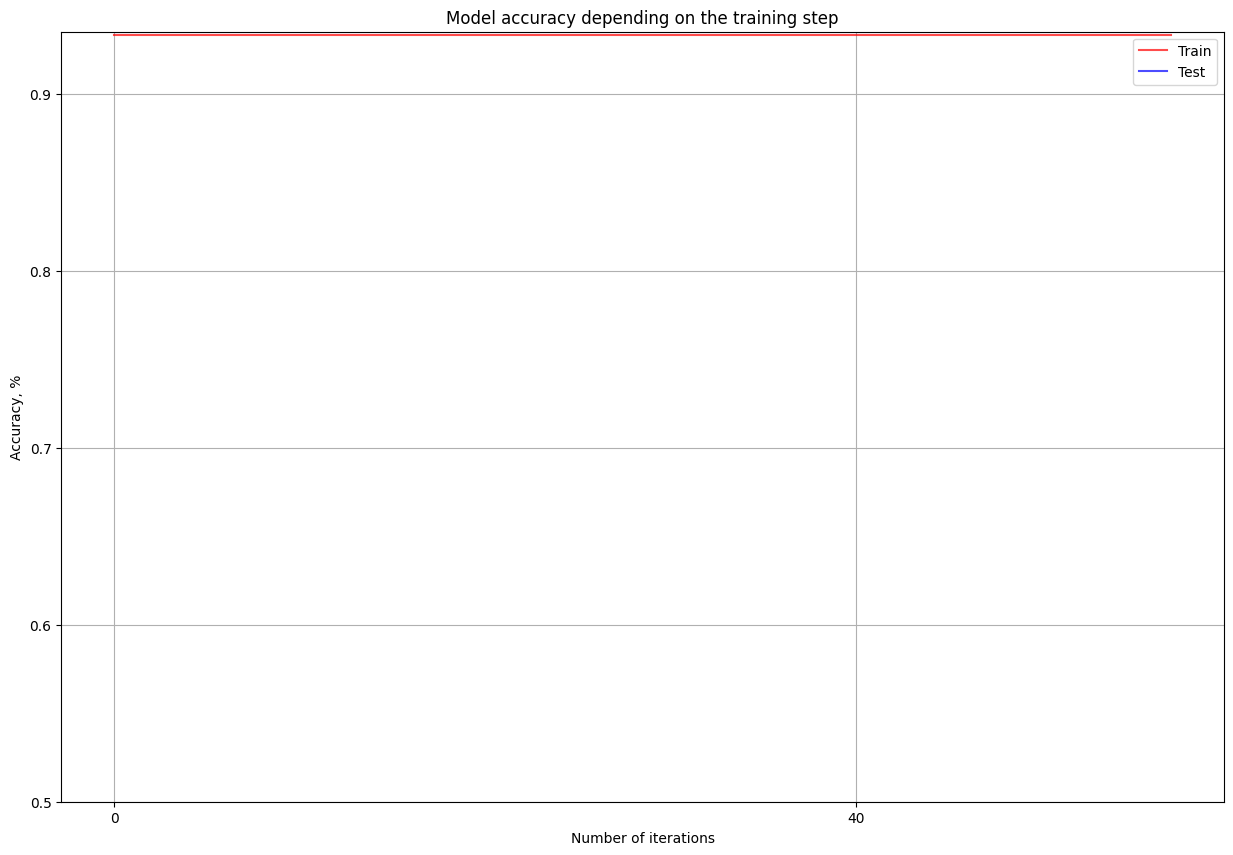

In [55]:
plt.figure(figsize=(15,10))
plt.title("Model accuracy depending on the training step")

plt.plot(np.arange(0, len(costs)), [get_accuracy(X_train, y_train, c["weights"]) for c in costs],alpha=0.7, label="Train", color="r")
plt.plot(np.arange(0, len(costs)), [get_accuracy(X_test, y_test, c["weights"]) for c in costs], alpha=0.7, label="Test", color="b")

plt.xlabel("Number of iterations")
plt.ylabel("Accuracy, %")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1, 40))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [56]:
# With weightage
# YOUR CODE HERE
# With weightage
# YOUR CODE HERE
clf_model_weightage = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train, y_train)
Theta_model_weightage = pd.Series(clf_model_weightage.coef_[0])
Theta_model_weightage.index = X_train.columns

In [57]:
Theta_model_weightage

NumberOfTimes90DaysLate                 0.517070
NumberOfTime30-59DaysPastDueNotWorse    0.540669
NumberOfTime60-89DaysPastDueNotWorse    0.019737
age                                    -0.031601
dtype: float64

In [58]:
print(f"Accuracy on the training set: {get_accuracy(X_train, y_train, Theta_model_weightage)}")

Accuracy on the training set: 0.93


In [59]:
y_pred_model_weightage = clf_model_weightage.predict(X_test)

In [60]:
# Without weightage
# YOUR CODE HERE
clf_model_no_weightage = LogisticRegression(random_state=0).fit(X_train, y_train)
Theta_model_no_weightage = pd.Series(clf_model_no_weightage.coef_[0])
Theta_model_no_weightage.index = X_train.columns
print(f"Accuracy on the training set: {get_accuracy(X_train, y_train, Theta_model_no_weightage)}")

Accuracy on the training set: 0.93


In [61]:
y_pred_model_no_weightage = clf_model_no_weightage.predict(X_test)
print(f"Accuracy on the test set: {get_accuracy(X_test, y_test, Theta_model_no_weightage)}")

Accuracy on the test set: 0.931


### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

In [ ]:
# YOUR CODE HERE

### Performance Metrics (1 point)

#### Precision

In [ ]:
# YOUR CODE HERE

#### Recall

In [ ]:
# YOUR CODE HERE

#### Classification Report

In [ ]:
# YOUR CODE HERE

#### Confusion matrix

In [ ]:
# YOUR CODE HERE

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations